/var/folders/8x/7ptf7srj4hv88f_rf699xq9r0000gn/T/ipykernel_32770/1885807257.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x labels for readability
/var/folders/8x/7ptf7srj4hv88f_rf699xq9r0000gn/T/ipykernel_32770/1885807257.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x labels for readability
/var/folders/8x/7ptf7srj4hv88f_rf699xq9r0000gn/T/ipykernel_32770/1885807257.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x labels for readability
/var/folders/8x/7ptf7srj4hv88f_rf699xq9r0000gn/T/ipykernel_32770

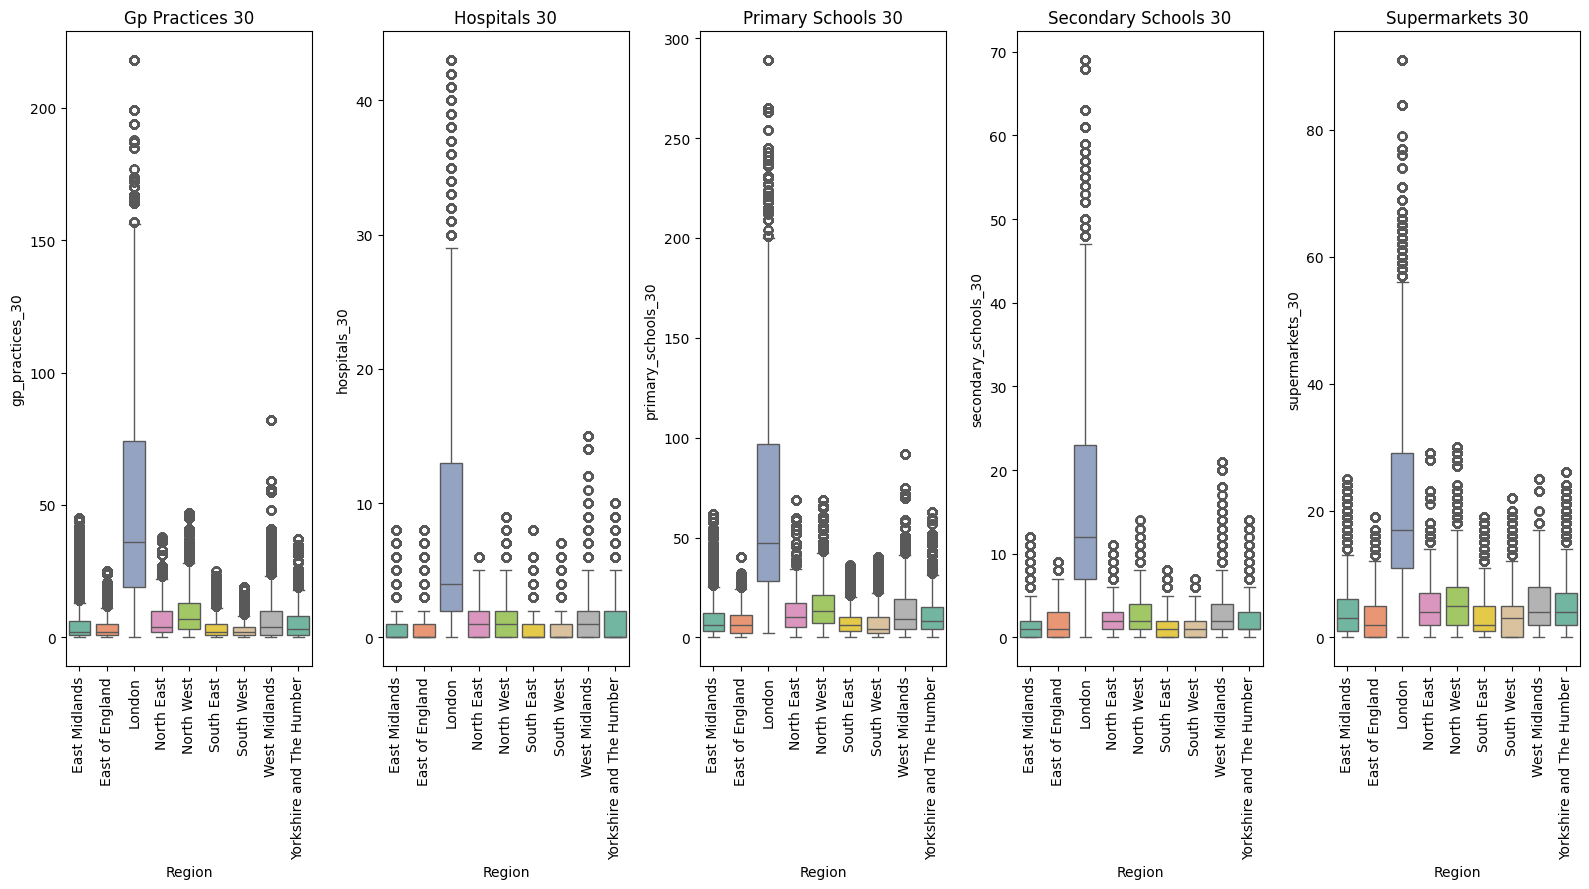

In [ ]:
#Acessibility Indicators by Region
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
postcode_df = pd.read_csv("../postcode/Postcode.csv")
pt_df = pd.read_csv("../AI23/ptAI.csv")
lsoa_df = pd.read_csv("../postcode/LSOA.csv")
LADNM_df = pd.read_csv("../postcode/LADNM.csv")

df = pd.merge(postcode_df, pt_df, left_on='lsoa11cd', right_on="geo_code", how='right')
df = pd.merge(df, lsoa_df, left_on='lsoa11cd', right_on="lsoa11cd", how='left')
df = pd.merge(df, LADNM_df, left_on='ladnm', right_on="ladnm", how='left')

# Convert region to categorical type
df["Region"] = df["Region"].astype("category")
columns=["Region","lsoa11cd","gp_practices_30","hospitals_30","primary_schools_30","secondary_schools_30","supermarkets_30"]
df=df[columns]

# Define the AI columns to plot
ai_columns = ['gp_practices_30', 'hospitals_30', 'primary_schools_30', 
              'secondary_schools_30', 'supermarkets_30']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 9))  
axes = axes.flatten()  
for i, ai in enumerate(ai_columns):
    sns.boxplot( x="Region", y=ai, ax=axes[i],hue="Region" ,palette='Set2',data=df)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90) 
    axes[i].set_title(ai.replace("_", " ").title()) 
plt.tight_layout()
plt.show()


Explained variance ratio: [0.94842884 0.03012094]


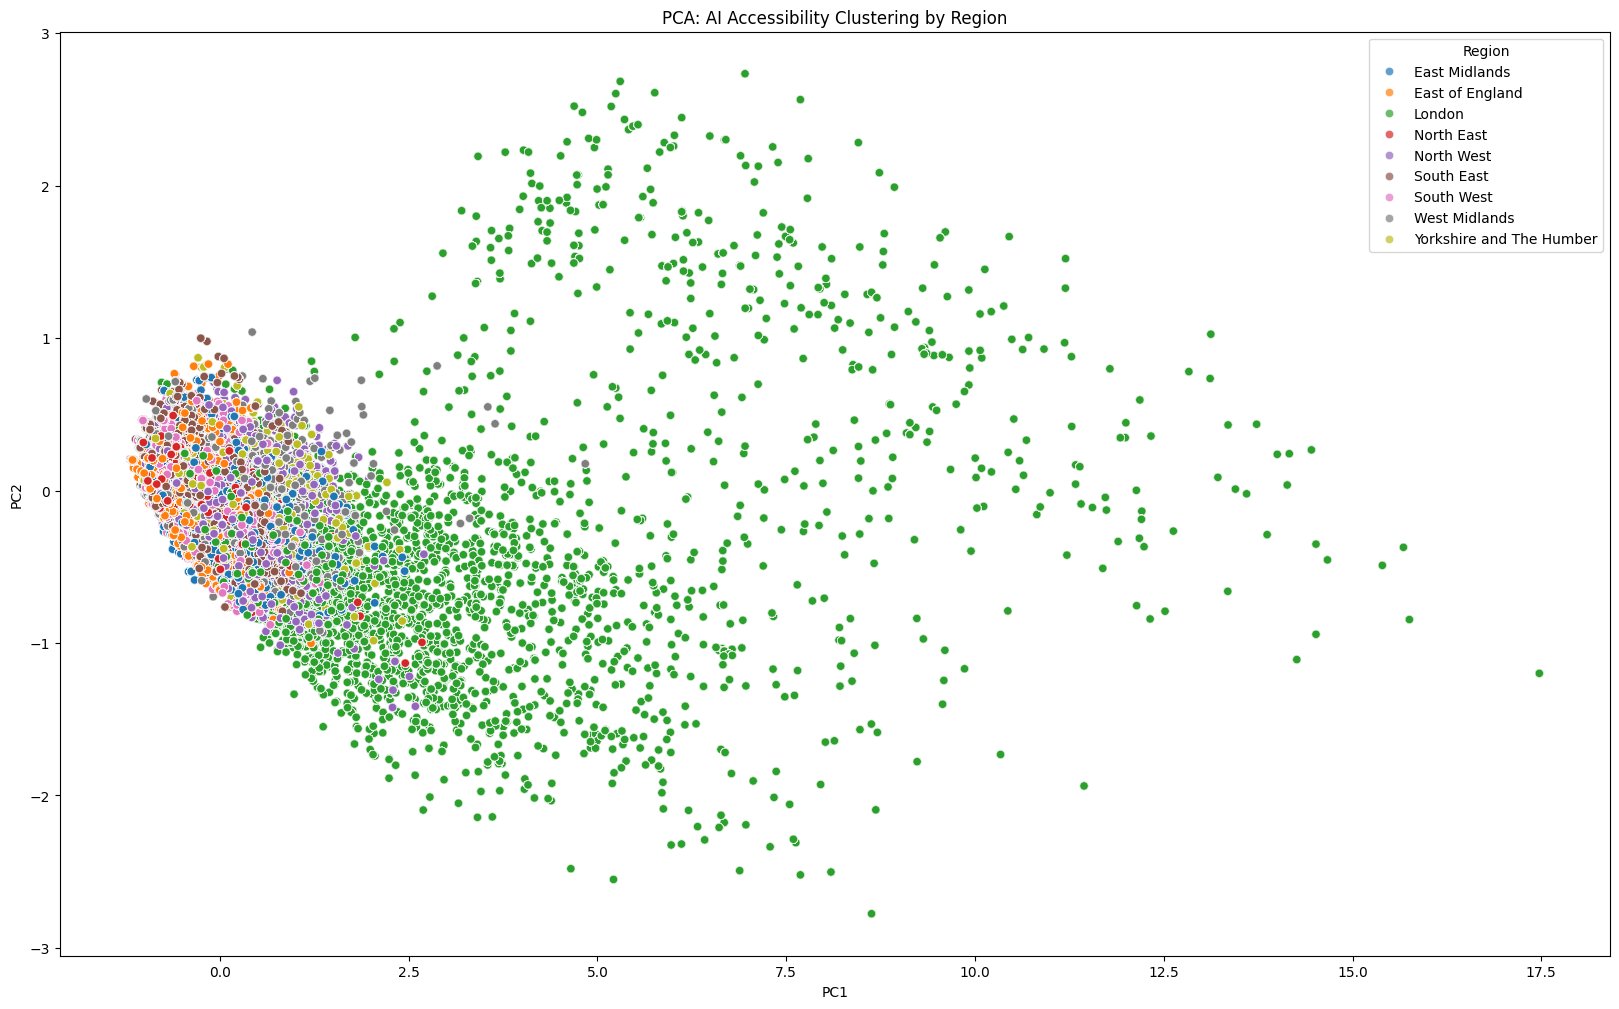

In [ ]:
# PCA on Accessibility Indicators by Region
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

columns=["RGN22NM","lsoa11cd","gp_practices_30","hospitals_30","primary_schools_30","secondary_schools_30","supermarkets_30","nearest_parks","nearest_main_bua"]
df=df[columns]

ai_columns = ['gp_practices_30', 'hospitals_30', 'primary_schools_30', 
              'secondary_schools_30', 'supermarkets_30']

df_ai = df[ai_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ai)

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["Region"] = df["RGN22NM"]  

print("Explained variance ratio:", pca.explained_variance_ratio_)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Region", palette="tab10", alpha=0.7)
plt.title("PCA: AI Accessibility Clustering by Region")
plt.show()



In [ ]:
#Zoopla property listings dataset
 
import pandas as pd
df = pd.read_csv("../zoopla/finals/DFlogged.csv")
print(df.columns)

Index(['num_bedrooms', 'num_bathrooms', 'num_recepts', 'price_last',
       'latitude', 'longitude', 'property_type_Bungalow',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_Flat', 'property_type_Maisonette',
       'property_type_Terraced house', 'Off street parking', 'Driveway',
       'Conservatory', 'Garage', 'Dining Room', 'Swimming pool',
       'nearest_main_bua', 'end_date_numeric', 'lad22cdLog', 'pcuLog',
       'price_lastLog', 'nearest_parksLog', 'gp_practices_30Log',
       'hospitals_30Log', 'primary_schools_30Log', 'secondary_schools_30Log',
       'supermarkets_30Log'],
      dtype='object')


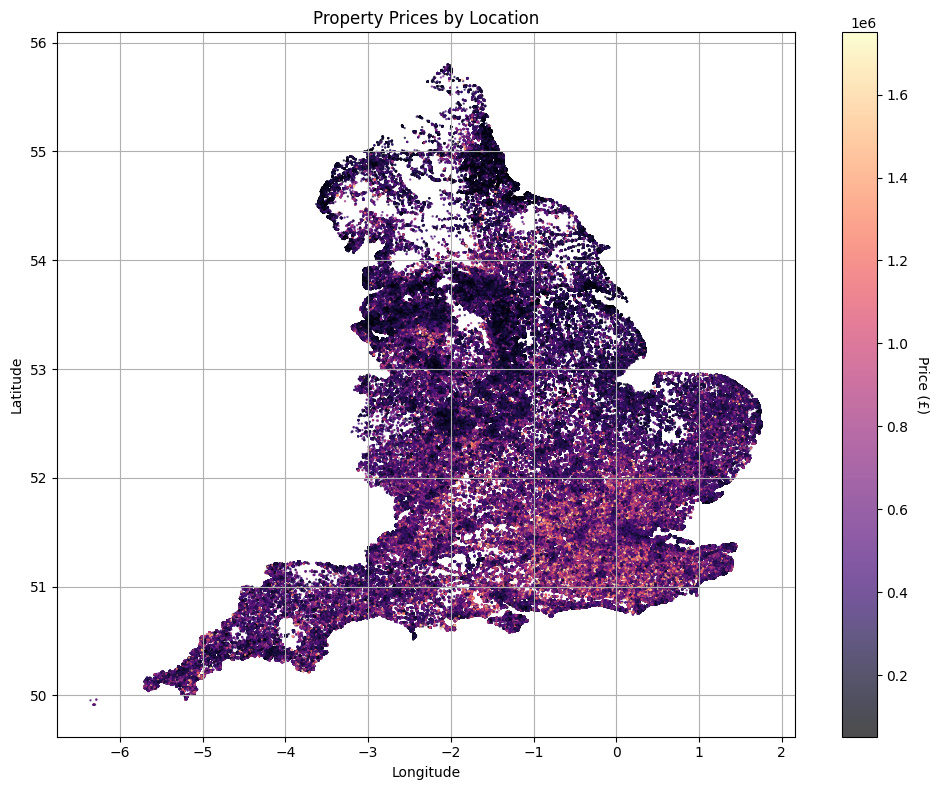

In [ ]:
#Mapping Property Prices 
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("../zoopla/finals/DF_final.csv")

# Scatter plot using longitude, latitude, and color as price
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['longitude'], 
    df['latitude'], 
    c=df['price_last'], 
    cmap='magma',     
    alpha=0.7,
    s=0.5     
)
cbar = plt.colorbar(scatter)
cbar.set_label('Price (£)', rotation=270, labelpad=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Prices by Location')
plt.grid(True)
plt.tight_layout()
plt.show()


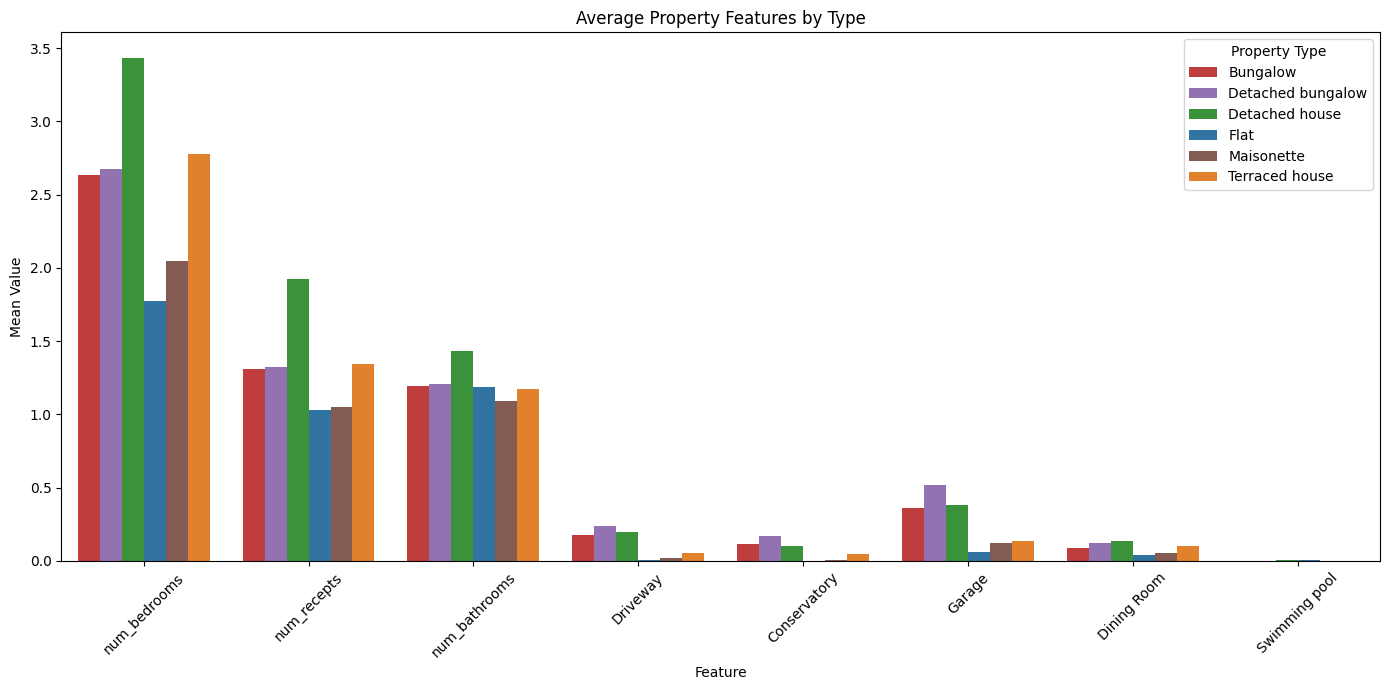

In [ ]:
#Average Property Features by Type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
property_types = df['property_type'].unique()
colors = sns.color_palette("tab10", n_colors=len(property_types))

#dictionary mapping each property type to a color
property_type_palette = dict(zip(property_types, colors))
features = [
    'num_bedrooms', 'num_recepts', 'num_bathrooms',
    'Driveway', 'Conservatory', 'Garage',
    'Dining Room', 'Swimming pool'
]
df_grouped = df.groupby('property_type')[features].mean().reset_index()
df_melted = df_grouped.melt(id_vars='property_type', var_name='Feature', value_name='Mean Value')
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='Feature', y='Mean Value', hue='property_type', palette=property_type_palette)  
plt.title('Average Property Features by Type')
plt.xticks(rotation=45)
plt.ylabel('Mean Value')
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()


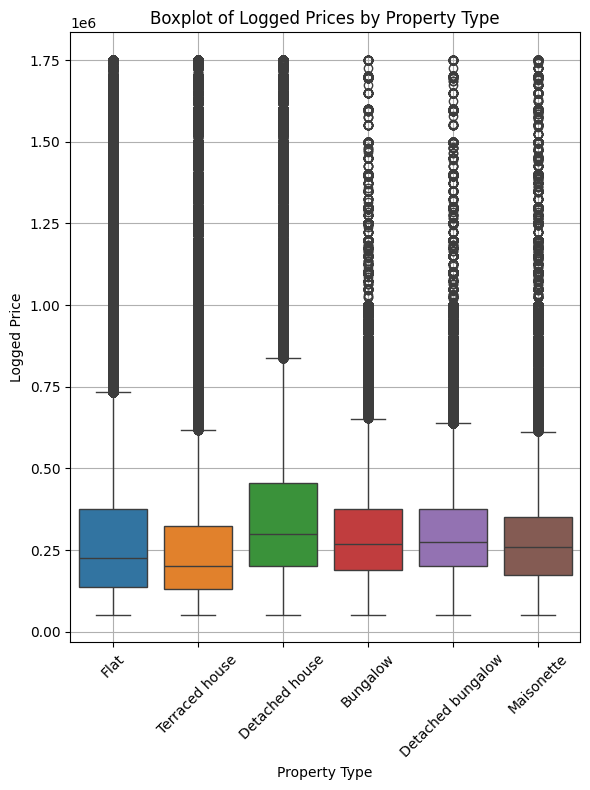

In [ ]:

#Box plot of property prices by property type 
df['property_type'] = df[property_type_cols].idxmax(axis=1).str.replace('property_type_', '')
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, x='property_type', y='price_last', hue='property_type', palette=property_type_palette)
plt.xticks(rotation=45)
plt.title('Boxplot of Logged Prices by Property Type')
plt.ylabel('Logged Price')
plt.xlabel('Property Type')
plt.tight_layout()
plt.grid(True)
plt.show()
